<a href="https://colab.research.google.com/github/deekshitatrivedi/Fake-News-Detection/blob/main/FND.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
import re
import string

In [ ]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv")

In [ ]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_fake['class'] = 0
data_true['class'] = 1

In [ ]:
data_fake.shape, data_true.shape

((23481, 5), (21417, 5))

In [ ]:
data_merge = pd.concat([data_fake, data_true], axis =0 )
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data = data_merge.drop(["title", "subject","date"], axis = 1)

In [ ]:
data.isnull().sum()

,0
text,0
class,0


In [ ]:
data.columns

Index(['text', 'class'], dtype='object')

**DATA PREPROCESSING**

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]',"", text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+\www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
data['text'] = data['text'].apply(wordopt)

In [ ]:
x = data['text']
y = data['class']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

**Vectorization (TF - IDF)**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

**RANDOM FOREST MODEL**

Random Forest Model Accuracy: 0.9877951002227171
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      5774
           1       0.99      0.99      0.99      5451

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



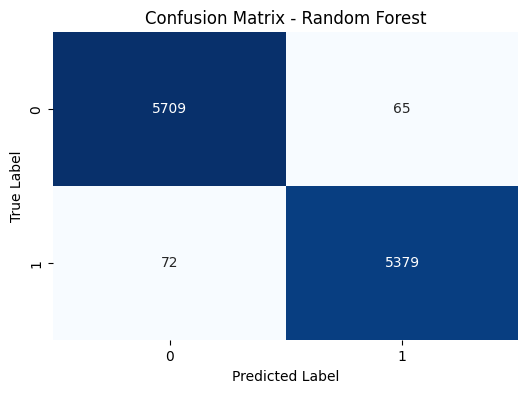

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(xv_train, y_train)
rf_y_pred = rf_model.predict(xv_test)
print("Random Forest Model Accuracy:", accuracy_score(y_test, rf_y_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_y_pred))
conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

**PASSIVE AGRESSIVE MODEL**

Passive Aggressive Model Accuracy: 0.9948329621380846
Passive Aggressive Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      5774
           1       0.99      1.00      0.99      5451

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



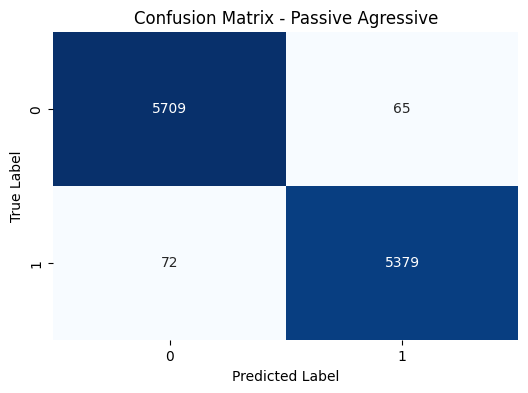

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

pa_model = PassiveAggressiveClassifier(max_iter=50)

pa_model.fit(xv_train, y_train)

pa_y_pred = pa_model.predict(xv_test)

print("Passive Aggressive Model Accuracy:", accuracy_score(y_test, pa_y_pred))
print("Passive Aggressive Classification Report:\n", classification_report(y_test, pa_y_pred))

conf_matrix = confusion_matrix(y_test, rf_y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Passive Agressive")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
!pip install flask-ngrok
!pip install flask
!pip install pyngrok
!pip install gunicorn
!gunicorn -w 4 app:app
!killall ngrok
from flask_ngrok import run_with_ngrok
from pyngrok import ngrok



[2024-10-19 13:59:46 +0000] [14817] [INFO] Starting gunicorn 23.0.0
[2024-10-19 13:59:46 +0000] [14817] [INFO] Listening at: http://127.0.0.1:8000 (14817)
[2024-10-19 13:59:46 +0000] [14817] [INFO] Using worker: sync
[2024-10-19 13:59:46 +0000] [14818] [INFO] Booting worker with pid: 14818
[2024-10-19 13:59:46 +0000] [14818] [ERROR] Exception in worker process
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/gunicorn/arbiter.py", line 608, in spawn_worker
    worker.init_process()
  File "/usr/local/lib/python3.10/dist-packages/gunicorn/workers/base.py", line 135, in init_process
    self.load_wsgi()
  File "/usr/local/lib/python3.10/dist-packages/gunicorn/workers/base.py", line 147, in load_wsgi
    self.wsgi = self.app.wsgi()
  File "/usr/local/lib/python3.10/dist-packages/gunicorn/app/base.py", line 66, in wsgi
    self.callable = self.load()
  File "/usr/local/lib/python3.10/dist-packages/gunicorn/app/wsgiapp.py", line 57, in load
    return self.l

In [ ]:
from flask import Flask, request, render_template ,url_for, redirect, flash
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
    status = request.args.get('status')
    return render_template('index.html', status=status)


@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']

        if username == "user" and password == "password":
            return redirect(url_for('success', status='login_success'))
        else:
            return redirect(url_for('home', status='login_failed'))

    return render_template('login.html')

@app.route('/signup', methods=['GET', 'POST'])
def signup():
    if request.method == 'POST':
        FirstName = request.form['FirstName']
        LastName = request.form['LastName']
        username = request.form['username']
        password = request.form['password']

        return redirect(url_for('success', status='signup_success'))

    return render_template('signup.html')

@app.route('/success')
def success():
    status = request.args.get('status')
    return render_template('success.html', status=status)


@app.route('/result', methods=['POST'])
def result():
    if request.method == 'POST':
        news = request.form.get('article', '')

        # If no article is provided, return an error message
        if not news.strip():
            return '''
            <div class="alert alert-danger text-center mt-4">Error: No article was provided. Please enter a news article!</div>
            '''


        try:
            news_transformed = vectorization.transform([news])
            pa_prediction = pa_model.predict(news_transformed)[0]
            prediction = 'Fake' if pa_prediction == 0 else 'Real'
            color = 'red' if prediction == 'Fake' else 'green'

            # Render the result page with the prediction
            return render_template('result.html', prediction=prediction, color=color)

        except Exception as e:
            # Log the exception and return an error message
            print(f"Error processing the news article: {e}")
            return '''
            <div class="alert alert-danger text-center mt-4">Error processing the article. Please try again later.</div>
            '''

@app.route('/loginresult', methods=['POST'])
def loginresult():
  if request.method == 'POST':
        news = request.form.get('article', '')

        # If no article is provided, return an error message
        if not news.strip():
            return '''
            <div class="alert alert-danger text-center mt-4">Error: No article was provided. Please enter a news article!</div>
            '''

        # Make sure vectorization and model are loaded properly
        try:
            news_transformed = vectorization.transform([news])
            pa_prediction = pa_model.predict(news_transformed)[0]
            prediction = 'Fake' if pa_prediction == 0 else 'Real'
            color = 'red' if prediction == 'Fake' else 'green'

            # Render the result page with the prediction
            return render_template('loginresult.html', prediction=prediction, color=color)

        except Exception as e:
            # Log the exception and return an error message
            print(f"Error processing the news article: {e}")
            return '''
            <div class="alert alert-danger text-center mt-4">Error processing the article. Please try again later.</div>
            '''


ngrok.set_auth_token("2n70mJQZfbDAeiV5YRKgzvl5XR8_8HybWZmxQAw7y4Z1ST2")

public_url = ngrok.connect(addr="5000", bind_tls=True)
print(f"Public URL: {public_url}")

if __name__ == '__main__':
    app.run()


Public URL: NgrokTunnel: "https://133f-34-27-199-56.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://133f-34-27-199-56.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040
